In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import quantum as qm
import asymmetric as asym
import scipy.sparse as sparse
import scipy.sparse.linalg as la

In [ ]:
levels = 13
data = np.zeros((3,2,levels))
for i, L in enumerate([8,10,12]):
    
    trials = 260 - 20*L
    rs = np.zeros((trials, levels))
    hs = np.logspace(-1,1, levels)
    
    # Only create these once
    H0 = asym.dense_H(L)
    _, _, _, sig_z_list = ([sig/2 for sig in sigs] for sigs in qm.get_sigma_lists(L))

    for idx, h in enumerate(hs):
        for j in range(trials):
            H_pert = qm.get_local_field(sig_z_list, np.random.rand(L)*2*h - h)/2
            H = H0 + H_pert
            choose = L//2
            rs[j, idx] = qm.get_r(asym.mat2list(H)[choose], nonz=True)

    data[i] = qm.mean_and_std(rs)
#     rs[i,0] = mean
#     rs[i,1] = std
    print(L)

8
10


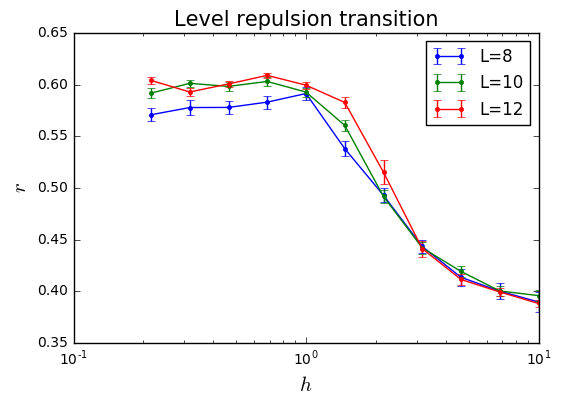

In [43]:
ax = plt.subplot(111)
for i, L in enumerate([8,10,12]):
    ax.set_xscale("log", nonposx='clip')
    ax.errorbar(
        hs,
        data[i,0],
        yerr = data[i,1],
        marker = '.',
        drawstyle = 'steps-mid-',
        label ='L='+str(L)
    )
    plt.xlabel('$h$', fontsize=15)
    plt.ylabel('$r$', fontsize=15)
#     plt.ylim(.4,.6)
plt.legend()
plt.xlim(1e-1,10)
plt.title("Level repulsion transition", fontsize=15)
# plt.savefig("figures/levelrepultrans.pdf")
plt.show()

In [16]:
np.logspace(-2/3,1, 11)

array([ 0.21544347,  0.31622777,  0.46415888,  0.68129207,  1.        ,
        1.46779927,  2.15443469,  3.16227766,  4.64158883,  6.81292069,
       10.        ])

In [ ]:
X = sparse.csr_matrix(sparse.diags([-9,-8,-7,-6,-5,-4,-3,-2,-1,0.00000000000001,1,2,3,4,5,6,7,8,9]))

In [ ]:
val, _ = la.eigsh(X, sigma=0, k = 4, which="LA")
qm.chop(val)

In [ ]:
L = 8

H0 = asym.dense_H(L)
H0 = H0 + asym.init_pert(L, 4)
H0 = H0 + asym.finl_pert(L, 4)

alph2Sz, Sz2alph = asym.permutations(L)
plt.matshow(np.absolute(H0.A[alph2Sz][:,alph2Sz]))
plt.show()

In [ ]:
vals = np.array([-2,-1,0,1E-16, 3, 4, 5])
print('zeros:', sum(np.isclose(vals,0)))
vals = vals[np.isclose(np.isclose(vals,0),0)]
vals = vals[vals>0]
print(vals)

In [ ]:
mean = np.array([1,2,3,4])
np.append(mean, 5)
print(mean)
print(np.append(mean, 5))

In [15]:
rs

array([[ 0.47988439,  0.42147488,  0.43166956,  0.43914512,  0.47489996,
         0.56277852],
       [ 0.45889272,  0.43790773,  0.44897086,  0.42918392,  0.45450246,
         0.72552431],
       [ 0.45007658,  0.43459462,  0.37906601,  0.44527093,  0.4715649 ,
         0.56904339],
       [ 0.45495151,  0.46992976,  0.38649643,  0.45886743,  0.51540321,
         0.65686873],
       [ 0.48038013,  0.41473309,  0.45706452,  0.38987194,  0.51609341,
         0.60931703],
       [ 0.44250427,  0.49344476,  0.41916336,  0.42327641,  0.49012448,
         0.67923861],
       [ 0.4879483 ,  0.45514168,  0.46436911,  0.45632215,  0.42935516,
         0.52363578],
       [ 0.4267916 ,  0.41397126,  0.4734302 ,  0.47774322,  0.48085008,
         0.63196574],
       [ 0.39553729,  0.40688853,  0.46176698,  0.37052705,  0.47182975,
         0.56009505],
       [ 0.43519046,  0.44185205,  0.4499624 ,  0.44700002,  0.49459787,
         0.70749139],
       [ 0.50401509,  0.43345114,  0.43087282,  0.

In [33]:
a,b,c = ([x/2 for x in a] for a in ([1,2],[2,3],[3,4]))
b

[1.0, 1.5]

In [31]:
nested_list = [[1, 4], [9, 25]]
for i in [map(np.sqrt, x) for x in nested_list]: print(i)